In [4]:
import numpy as np
import pandas as pd
import sklearn
import ot


In [512]:
names_genre = np.load('../datasets/namesngenre.npy')
ratings_train = np.load('../datasets/ratings_train.npy')

df_titles = pd.DataFrame(names_genre)
df_titles= df_titles.rename(columns={0:"title",1:"genre"})
df_titles['average_rating'] = np.nanmean(ratings_train, axis=0)

df_ratings = pd.DataFrame(np.nan_to_num(ratings_train.T))


<BarContainer object of 11 artists>

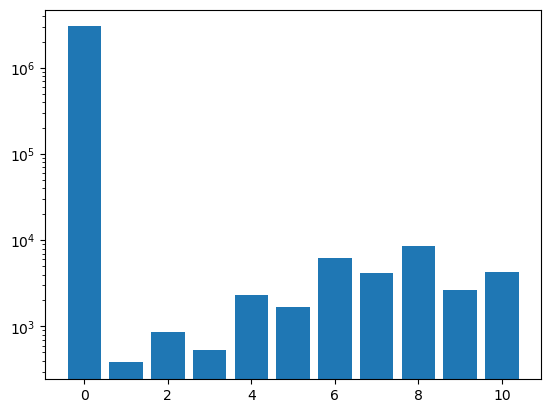

In [511]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_yscale('log')
result = df_ratings.apply(pd.value_counts).sum(axis=1)
plt.bar(height=result.tolist(), x=range(0, 11), )


In [5]:
df_titles


,title,genre,average_rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.854167
1,Jumanji (1995),Adventure|Children|Fantasy,3.391892
2,Grumpier Old Men (1995),Comedy|Romance,3.029412
3,Waiting to Exhale (1995),Comedy|Drama|Romance,2.000000
4,Father of the Bride Part II (1995),Comedy,3.000000
...,...,...,...
4975,Game Night (2018),Action|Comedy|Crime|Horror,4.500000
4976,Making a Murderer (2015),Crime|Documentary,3.500000
4977,Elsa & Fred (2005),Comedy|Drama|Romance,3.750000
4978,Tomb Raider (2018),Action|Adventure|Fantasy,3.500000


In [36]:
m = ratings_train.shape[0]
n = ratings_train.shape[1]
k = 5
mu = .1
lam = .1
step_I = .00007
step_U = .00007
I = np.ones((m, k))
U = np.ones((n, k))
R = np.nan_to_num(ratings_train, copy=True)

iters = 100

for i in range(iters):
  loss = np.linalg.norm((R - I@U.T), ord='fro')**2 + mu*np.linalg.norm(I, ord='fro')**2 + lam*np.linalg.norm(U, ord='fro')**2

  print(f'Loss at iter {i+1}: {loss}')

  grad_U = -2*R.T@I + 2*U@I.T@I + 2*mu*U
  grad_I = -2*R@U + 2*I@U.T@U + 2*lam*I

  U -= step_U*grad_U
  I -= step_I*grad_I


rmse = np.sqrt(np.mean((I@U.T-R)**2))
rmse


Loss at iter 1: 75260319.25000001
Loss at iter 2: 154642270.36136588
Loss at iter 3: 11290888.961708253
Loss at iter 4: 36404596.01274762
Loss at iter 5: 45976966.429942794
Loss at iter 6: 901976.8269470352
Loss at iter 7: 713172.9266354559
Loss at iter 8: 614229.9928827544
Loss at iter 9: 555428.3194980763
Loss at iter 10: 517548.4846874105
Loss at iter 11: 491729.86250796606
Loss at iter 12: 473381.9041521768
Loss at iter 13: 459917.6932891711
Loss at iter 14: 449783.18890945805
Loss at iter 15: 441996.52855142334
Loss at iter 16: 435911.4525654649
Loss at iter 17: 431087.93759985274
Loss at iter 18: 427217.7203002306
Loss at iter 19: 424079.53699068114
Loss at iter 20: 421511.2206442733
Loss at iter 21: 419391.74905552744
Loss at iter 22: 417629.3728212019
Loss at iter 23: 416153.57105035346
Loss at iter 24: 414909.48162030673
Loss at iter 25: 413853.96934728243
Loss at iter 26: 412952.8014925792
Loss at iter 27: 412178.5863619699
Loss at iter 28: 411509.2470082209
Loss at iter 29: 

0.3630064163361999

In [46]:
data_path = '../datasets/'
data = np.load(data_path + 'ratings_train.npy')
test_data = np.load(data_path + 'ratings_test.npy')

step_I = .00007
step_U = .00007

mu = .1
lam = .1

K = 5
I = np.random.rand(len(data),K) #Generating random matrices, maybe a better initialization can be initialized
U = np.random.rand(len(data[0]),K).T


non_nan = np.argwhere(~np.isnan(data))

for (i, j) in non_nan:
  eij = data[i][j] - np.dot(I[i,:],U[:,j])

  for k in range(K):
    I[i][k] = I[i][k] + step_I * (2 * eij * U[k][j] - mu * I[i][k])
    U[k][j] = U[k][j] + step_U * (2 * eij * I[i][k] - lam * U[k][j])


In [3]:
names_genre = np.load('../datasets/namesngenre.npy')
ratings_train = np.load('../datasets/ratings_train.npy')

df_titles = pd.DataFrame(names_genre)
df_titles= df_titles.rename(columns={0:"title",1:"genre"})
df_titles['average_rating'] = np.nanmean(ratings_train, axis=0)

df_ratings = pd.DataFrame(ratings_train)
ratings_train.shape


(610, 4980)

In [71]:
temp_non_zerp = np.nan_to_num(ratings_train)
u = (temp_non_zerp / temp_non_zerp.sum()).sum(axis=1)
v = (temp_non_zerp.T / temp_non_zerp.T.sum()).sum(axis=1)


0.9999999999999996

In [113]:
import numpy as np
import ot

lambd = 1e-3
temp_non_zerp = np.nan_to_num(ratings_train)
u = (temp_non_zerp / temp_non_zerp.sum()).sum(axis=1)
v = (temp_non_zerp.T / temp_non_zerp.T.sum()).sum(axis=1)
M = temp_non_zerp

Gs = ot.sinkhorn(u, v, M, lambd)
print(np.allclose(Gs.T.sum(axis=1), v))
print(np.allclose(Gs.sum(axis=1), u))


True
True


In [542]:
pi_hat = ratings_train / np.nansum(ratings_train)


movies_average_rating = np.nanmean(ratings_train, axis=0)
users_average_rating = np.nanmean(ratings_train, axis=1)

movies_average_rating_normalized = movies_average_rating / movies_average_rating.sum()
users_average_rating_normalized = users_average_rating / users_average_rating.sum()

movies_total_rating = np.nansum(ratings_train, axis=0)
users_total_rating = np.nansum(ratings_train, axis=1)
users_normalized_total_rating = users_total_rating / users_total_rating.sum()
movies_normalized_total_rating = movies_total_rating / movies_total_rating.sum()


u = users_normalized_total_rating
v = movies_normalized_total_rating

u.sort()
v.sort()


<BarContainer object of 610 artists>

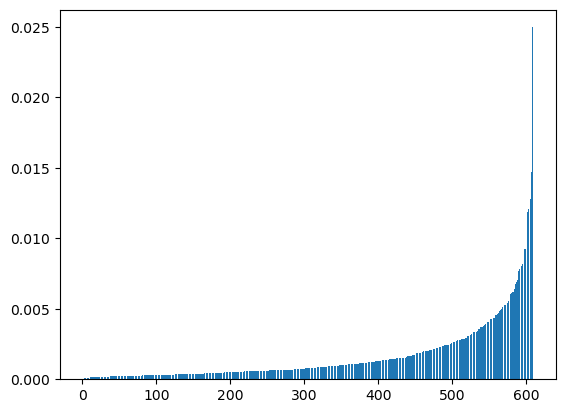

In [543]:
import matplotlib.pyplot as plt
plt.bar(range(len(u)), u)


<BarContainer object of 4980 artists>

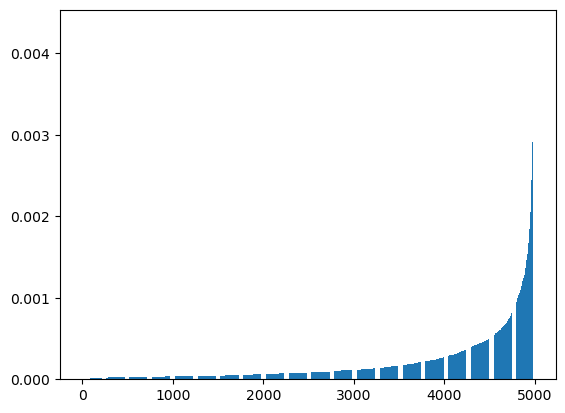

In [544]:
import matplotlib.pyplot as plt
plt.bar(range(len(v)), v)


In [606]:
from sklearn.decomposition import NMF
import scipy.sparse as sps

csr_ratings_train = sps.csr_matrix(np.nan_to_num(ratings_train), shape=(610, 4980))
csr_ratings_train.eliminate_zeros()

nmf = NMF(n_components=1, init='nndsvd', random_state=0, max_iter=1000, beta_loss='kullback-leibler', solver='mu')
W = nmf.fit_transform(csr_ratings_train)
H = nmf.components_

print(W.shape)
print(H.shape)
print(nmf.reconstruction_err_)


(610, 1)
(1, 4980)
850.0137737613253


In [582]:
def compute_rmse(predictions, test_matrix):
  masked = np.ma.array(test_matrix, mask=np.isnan(test_matrix))
  diff = np.ma.subtract(predictions, masked)
  squared = np.ma.power(diff, 2)
  return np.ma.sqrt(np.ma.mean(squared))


In [127]:
def sinkhorn(A, N, M, L):
    # Pseudo-Code for calculating the doubly stochastic matrix
    # using Sinkhorn-Knopp algorithm.
    # ----------
    # Input: positive matrix A[N x N], max iteration L

    def converge(M):
      u = (M / M.sum()).sum(axis=1)
      v = (M.T / M.T.sum()).sum(axis=1)
      return np.allclose(u.sum(), 1) and np.allclose(v.sum(), 1)

    for i in range(L):
        A = A / np.matmul(A, np.ones((1, N)))
        A = A / np.matmul(np.ones((M, 1)), A)

        # Test for convergence and early stop.
        if converge(A):
            break

    return A
